### Viewing data

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv('/content/train.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
df['sentiment'].value_counts()

In [ ]:
positives = (df['sentiment']==1).sum() / len(df['sentiment'])*100
negatives = (df['sentiment']==0).sum() / len(df['sentiment'])*100

print("There is {}% of positives and {}% of negative labels".format(positives, negatives))

In [ ]:
symbols_avg = df['text'].apply(len).mean()

print('Average numbers of symbols is equal {}'.format(np.round(symbols_avg)))

In [ ]:
words_avg = df['text'].str.split(" ").apply(len).mean()

print('Average numbers of words is equal {}'.format(np.round(words_avg)))

### Preparation of data

In [ ]:
# lowercase all text
df['text'] = df['text'].str.lower()

In [ ]:
# removing special characters and numbers
df['text'] = df['text'].replace(r'[^A-Za-z ]+', '', regex=True)

In [ ]:
# tokenize texts
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

df['tokens'] = df['text'].apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text,sentiment,tokens
0,for a movie that gets no respect there sure ar...,0,"[for, a, movie, that, gets, no, respect, there..."
1,bizarre horror movie filled with famous faces ...,0,"[bizarre, horror, movie, filled, with, famous,..."
2,a solid if unremarkable film matthau as einste...,0,"[a, solid, if, unremarkable, film, matthau, as..."
3,its a strange feeling to sit alone in a theate...,0,"[its, a, strange, feeling, to, sit, alone, in,..."
4,you probably all already know this by now but ...,0,"[you, probably, all, already, know, this, by, ..."


In [ ]:
#stop words
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')
df['stop'] = df['tokens'].apply(lambda x: [word for word in x if (word not in stop)])

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,sentiment,tokens,stop
0,for a movie that gets no respect there sure ar...,0,"[for, a, movie, that, gets, no, respect, there...","[movie, gets, respect, sure, lot, memorable, q..."
1,bizarre horror movie filled with famous faces ...,0,"[bizarre, horror, movie, filled, with, famous,...","[bizarre, horror, movie, filled, famous, faces..."
2,a solid if unremarkable film matthau as einste...,0,"[a, solid, if, unremarkable, film, matthau, as...","[solid, unremarkable, film, matthau, einstein,..."
3,its a strange feeling to sit alone in a theate...,0,"[its, a, strange, feeling, to, sit, alone, in,...","[strange, feeling, sit, alone, theater, occupi..."
4,you probably all already know this by now but ...,0,"[you, probably, all, already, know, this, by, ...","[probably, already, know, additional, episodes..."


In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
# lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemon = WordNetLemmatizer()
df['lemon'] = ''

text2 = df['stop'].values
for ind,text in enumerate(text2):
  df['lemon'][ind]  = [lemon.lemmatize(t) for t in text]


df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,text,sentiment,tokens,stop,lemon
0,for a movie that gets no respect there sure ar...,0,"[for, a, movie, that, gets, no, respect, there...","[movie, gets, respect, sure, lot, memorable, q...","[movie, get, respect, sure, lot, memorable, qu..."
1,bizarre horror movie filled with famous faces ...,0,"[bizarre, horror, movie, filled, with, famous,...","[bizarre, horror, movie, filled, famous, faces...","[bizarre, horror, movie, filled, famous, face,..."
2,a solid if unremarkable film matthau as einste...,0,"[a, solid, if, unremarkable, film, matthau, as...","[solid, unremarkable, film, matthau, einstein,...","[solid, unremarkable, film, matthau, einstein,..."
3,its a strange feeling to sit alone in a theate...,0,"[its, a, strange, feeling, to, sit, alone, in,...","[strange, feeling, sit, alone, theater, occupi...","[strange, feeling, sit, alone, theater, occupi..."
4,you probably all already know this by now but ...,0,"[you, probably, all, already, know, this, by, ...","[probably, already, know, additional, episodes...","[probably, already, know, additional, episode,..."


In [ ]:
def make_bigram(df_col):
  new_list = []
  for word1, word2 in zip(df_col, df_col[1:]):
    bigram = word1 + " " + word2
    new_list.append( bigram )
  return new_list

In [ ]:
df['bigrams'] = (df['lemon']).apply(make_bigram)
df.head()

,text,sentiment,tokens,stop,lemon,bigrams
0,for a movie that gets no respect there sure ar...,0,"[for, a, movie, that, gets, no, respect, there...","[movie, gets, respect, sure, lot, memorable, q...","[movie, get, respect, sure, lot, memorable, qu...","[movie get, get respect, respect sure, sure lo..."
1,bizarre horror movie filled with famous faces ...,0,"[bizarre, horror, movie, filled, with, famous,...","[bizarre, horror, movie, filled, famous, faces...","[bizarre, horror, movie, filled, famous, face,...","[bizarre horror, horror movie, movie filled, f..."
2,a solid if unremarkable film matthau as einste...,0,"[a, solid, if, unremarkable, film, matthau, as...","[solid, unremarkable, film, matthau, einstein,...","[solid, unremarkable, film, matthau, einstein,...","[solid unremarkable, unremarkable film, film m..."
3,its a strange feeling to sit alone in a theate...,0,"[its, a, strange, feeling, to, sit, alone, in,...","[strange, feeling, sit, alone, theater, occupi...","[strange, feeling, sit, alone, theater, occupi...","[strange feeling, feeling sit, sit alone, alon..."
4,you probably all already know this by now but ...,0,"[you, probably, all, already, know, this, by, ...","[probably, already, know, additional, episodes...","[probably, already, know, additional, episode,...","[probably already, already know, know addition..."


### Word clouds

In [ ]:
# divide for postivie and negative reviews

df_pos = df[df['sentiment']==1]
df_neg = df[df['sentiment']==0]

df_pos

In [ ]:
pos_bigrams = df_pos['bigrams'].sum()
neg_bigrams = df_neg['bigrams'].sum()
neg_words = df_neg['counter'].sum()
pos_words = df_pos['counter'].sum()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(values, num_of_words):
  wc = WordCloud(background_color="white", 
                relative_scaling=0.5).generate_from_frequencies(dict(values.most_common(num_of_words)))
  plt.figure(figsize=(10,8))
  plt.imshow(wc)
  plt.axis('off')
  plt.show()

plot_wordcloud(pos_words, 25)

In [ ]:
plot_wordcloud(pos_words, 100)

In [ ]:
plot_wordcloud(neg_words, 100)

### Preparing data for machine learning models

In [ ]:
# TFIDF
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 1000,  max_df = 0.4, lowercase=False, preprocessor=' '.join)

uni_vectorizer = vectorizer.fit(df['lemon'])
pickle.dump(uni_vectorizer, open("uni_vectorizer.sav", "wb"))


X = vectorizer.fit_transform(df['lemon']).toarray()

In [ ]:
def identity_tokenizer(text):
    return text

vectorizer = TfidfVectorizer(max_features = 1000,  max_df = 0.4, lowercase=False, tokenizer=identity_tokenizer) 

bi_vectorizer = vectorizer.fit_transform(df['bigrams'])
# pickle.dump(bi_vectorizer, open("bi_vectorizer.sav", "wb")


X_bi = vectorizer.fit_transform(df['bigrams']).toarray()

In [ ]:
# Diving dataset into train and test sets
from sklearn import model_selection, preprocessing

train_x, test_x, train_y, test_y = model_selection.train_test_split(X, df['sentiment'])
train_x_bi, test_x_bi, train_y_bi, test_y_bi = model_selection.train_test_split(X_bi, df['sentiment'])

### Import libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt   
from sklearn.metrics import confusion_matrix
import numpy as np




In [ ]:
def cm_plot(pred_y, test_y, classifier):
  cm = confusion_matrix(pred_y, test_y) 

  ax = plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=ax)  

  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title(classifier)
  ax.xaxis.set_ticklabels(['negative', 'postive'])
  ax.yaxis.set_ticklabels(['negative', 'postive'])

### Logistic regression


{'C': 1.0, 'penalty': 'l2'}
Accuracy is equal 85.55%


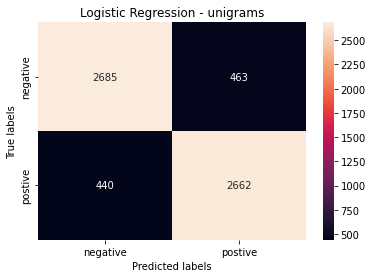

In [ ]:
classifier = LogisticRegression()
# param_grid = {'C' : [100, 10, 1.0, 0.1, 0.01],
#               'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
#               'penalty' : ['l2', 'l1']}
param_grid = {'C' : [1.0, 0.1,], 'penalty' : ['l2']}

grid_search = GridSearchCV(classifier, param_grid)
grid_search.fit(train_x,train_y)
print(grid_search.best_params_)

pred_y = grid_search.predict(test_x)
accuracy = np.round(accuracy_score(test_y, pred_y),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y, test_y, "Logistic Regression - unigrams")

pickle.dump(grid_search,open("logistic_uni.sav", "wb"))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy is equal 85.52%


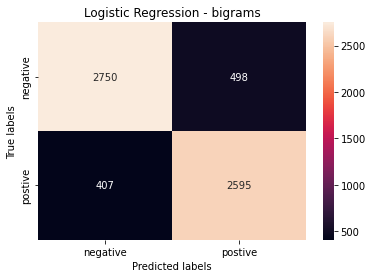

In [ ]:
classifier = LogisticRegression()
param_grid = {'C' : [100, 10, 1.0, 0.1, 0.01],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
              'penalty' : ['l2', 'l1']}


grid_search = GridSearchCV(classifier, param_grid)
grid_search.fit(train_x_bi,train_y_bi)
print(grid_search.best_params_)

pred_y_bi = grid_search.predict(test_x_bi)
accuracy = np.round(accuracy_score(test_y_bi, pred_y_bi),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y_bi, test_y_bi, "Logistic Regression - unigrams")

pickle.dump(grid_search,open("logistic_uni.sav", "wb"))

### Naive-Bayes

81.25


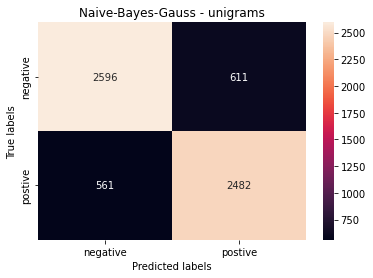

In [ ]:
classifier = GaussianNB()
classifier.fit(train_x,train_y)
pred_y = classifier.predict(test_x)

accuracy = np.round(accuracy_score(test_y, pred_y),4)*100
print(accuracy)
cm_plot(pred_y, test_y, "Naive-Bayes-Gauss - unigrams")

pickle.dump(grid_search,open("naive_gauss_uni.sav", "wb"))

73.07000000000001


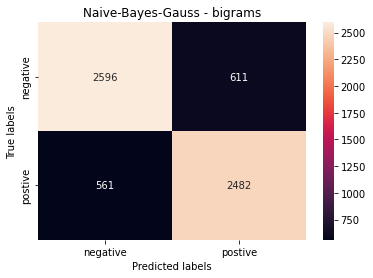

In [ ]:
classifier = GaussianNB()
classifier.fit(train_x_bi,train_y_bi)
pred_y_bi = classifier.predict(test_x_bi)

accuracy = np.round(accuracy_score(test_y_bi, pred_y_bi),4)*100
print(accuracy)
cm_plot(pred_y, test_y, "Naive-Bayes-Gauss - bigrams")

pickle.dump(grid_search,open("naive_gauss_bi.sav", "wb"))

{'alpha': 10}
Accuracy is equal 83.25%


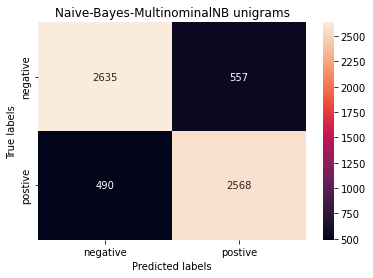

In [ ]:
classifier = MultinomialNB()
param_grid = {'alpha': (10 ,5 ,3, 1, 0.5, 0.1, 0.01, 0.001, 0.0001) }

grid_search = GridSearchCV(classifier, param_grid)
grid_search.fit(train_x,train_y)
print(grid_search.best_params_)

pred_y = grid_search.predict(test_x)
accuracy = np.round(accuracy_score(test_y, pred_y),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y, test_y, "Naive-Bayes-MultinominalNB unigrams")

pickle.dump(grid_search,open("naive_uni.sav", "wb"))

{'alpha': 3}
Accuracy is equal 74.5%


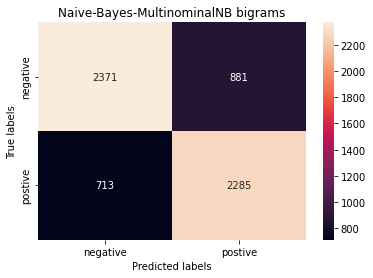

In [ ]:
classifier = MultinomialNB()
param_grid = {'alpha': (10 ,5 ,3, 1, 0.5, 0.1, 0.01, 0.001, 0.0001) }

grid_search = GridSearchCV(classifier, param_grid)
grid_search.fit(train_x_bi,train_y_bi)
print(grid_search.best_params_)

pred_y_bi = grid_search.predict(test_x_bi)
accuracy = np.round(accuracy_score(test_y_bi, pred_y_bi),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y_bi, test_y_bi, "Naive-Bayes-MultinominalNB bigrams")

pickle.dump(grid_search,open("naive_multi_bi.sav", "wb"))

83.74000000000001


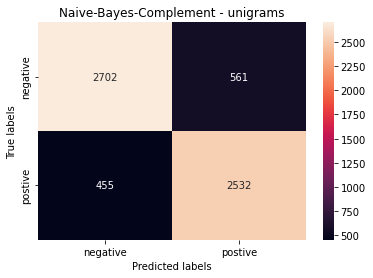

In [ ]:
classifier = ComplementNB()
classifier.fit(train_x,train_y)
pred_y = classifier.predict(test_x)

accuracy = np.round(accuracy_score(test_y, pred_y),4)*100
print(accuracy)
cm_plot(pred_y, test_y, "Naive-Bayes-Complement - unigrams")

pickle.dump(grid_search,open("naive_complement_uni.sav", "wb"))

74.67


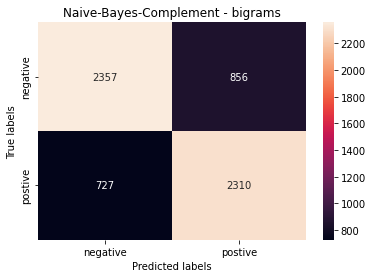

In [ ]:
classifier = ComplementNB()
classifier.fit(train_x_bi,train_y_bi)
pred_y_bi = classifier.predict(test_x_bi)

accuracy = np.round(accuracy_score(test_y_bi, pred_y_bi),4)*100
print(accuracy)
cm_plot(pred_y_bi, test_y_bi, "Naive-Bayes-Complement - bigrams")

pickle.dump(grid_search,open("naive_complement_bi.sav", "wb"))

82.75


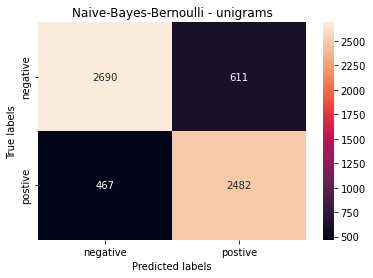

In [ ]:
classifier = BernoulliNB()
classifier.fit(train_x,train_y)
pred_y = classifier.predict(test_x)

accuracy = np.round(accuracy_score(test_y, pred_y),4)*100
print(accuracy)
cm_plot(pred_y, test_y, "Naive-Bayes-Bernoulli - unigrams")

pickle.dump(grid_search,open("naive_bernoulli_uni.sav", "wb"))

73.42


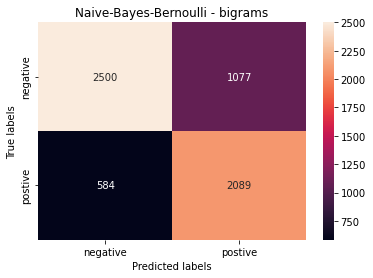

In [ ]:
classifier = BernoulliNB()
classifier.fit(train_x_bi,train_y_bi)
pred_y_bi = classifier.predict(test_x_bi)

accuracy = np.round(accuracy_score(test_y_bi, pred_y_bi),4)*100
print(accuracy)
cm_plot(pred_y_bi, test_y_bi, "Naive-Bayes-Bernoulli - bigrams")

pickle.dump(grid_search,open("naive_bernoulli_uni.sav", "wb"))

### K-nearest neighbors

{'n_neighbors': 220}
Accuracy is equal 80.47999999999999%


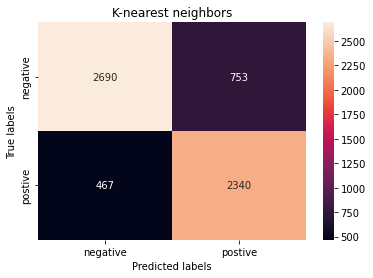

In [ ]:
classifier = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(10,250,10)}

grid_search = GridSearchCV(classifier, param_grid)
grid_search.fit(train_x,train_y)
print(grid_search.best_params_)

pred_y = grid_search.predict(test_x)
accuracy = np.round(accuracy_score(test_y, pred_y),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y, test_y, "K-nearest neighbors - unigrams")

pickle.dump(grid_search,open("knn_uni.sav", "wb"))

{'n_neighbors': 10}
Accuracy is equal 53.25%


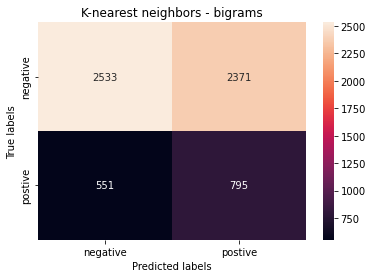

In [ ]:
classifier = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(10,250,10)}

grid_search = GridSearchCV(classifier, param_grid)
grid_search.fit(train_x_bi,train_y_bi)
print(grid_search.best_params_)

pred_y_bi = grid_search.predict(test_x_bi)
accuracy = np.round(accuracy_score(test_y_bi, pred_y_bi),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y_bi, test_y_bi, "K-nearest neighbors - bigrams")

pickle.dump(grid_search,open("knn_bi.sav", "wb"))

### Decsion Tree

{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 25}


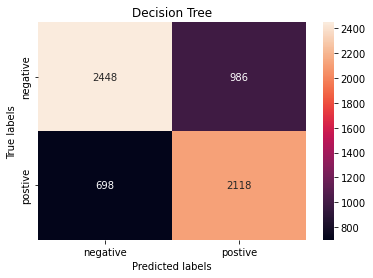

In [ ]:
classifier = DecisionTreeClassifier()
# param_grid = {'criterion':['gini', 'entropy'],
#               "max_depth":[5,10,15,20,25] , 
#               'min_samples_leaf':np.arange(5,30,5)}
param_grid = {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 25}

grid_search = GridSearchCV(classifier, param_grid)
grid_search.fit(train_x,train_y)
print(grid_search.best_params_)

pred_y = grid_search.predict(test_x)
accuracy = np.round(accuracy_score(test_y, pred_y),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y, test_y, "Decision Tree - unigrams")

pickle.dump(grid_search,open("tree_uni.sav", "wb"))

{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 25}
Accuracy is equal 73.33%


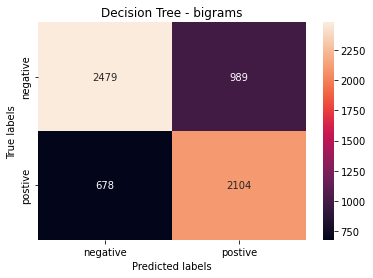

In [ ]:
classifier = DecisionTreeClassifier()
param_grid = {'criterion':['gini', 'entropy'],
              "max_depth":[5,10,15,20,25] , 
              'min_samples_leaf':np.arange(5,30,5)}


grid_search = GridSearchCV(classifier, param_grid)
grid_search.fit(train_x,train_y)
print(grid_search.best_params_)

pred_y = grid_search.predict(test_x)
accuracy = np.round(accuracy_score(test_y, pred_y),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y, test_y, "Decision Tree ")

pickle.dump(grid_search,open("tree.sav", "wb"))

In [ ]:
classifier = DecisionTreeClassifier()
param_grid = {'criterion':['gini', 'entropy'],
              "max_depth":[5,10,15,20,25] , 
              'min_samples_leaf':np.arange(5,30,5)}

grid_search = GridSearchCV(classifier, param_grid)
grid_search.fit(train_x,train_y)
print(grid_search.best_params_)

pred_y = grid_search.predict(test_x)
accuracy = np.round(accuracy_score(test_y, pred_y),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y, test_y, "Decision Tree - bigrams")

pickle.dump(grid_search,open("tree_bi.sav", "wb"))


# from six import StringIO
# from sklearn.tree import export_graphviz
# import pydotplus
# from IPython.display import Image

# dot_data = StringIO()
# export_graphviz(classifier,
#                out_file=dot_data,
#                feature_names=bi_vectorizer.get_feature_names_out(),
#                class_names=['postivie', 'negative'],
#                special_characters=True,
#                rounded=True,
#                filled=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('graph.png')
# Image(graph.create_png(), width=300)

### Decsion Forest

{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 25, 'n_estimators': 150}
Accuracy is equal 81.42%


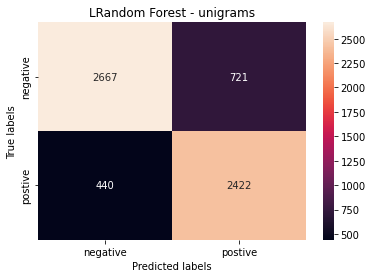

In [ ]:
classifier = RandomForestClassifier()
param_grid = {"n_estimators":[150] ,      #np.arange(0,300,50),
              'criterion': ['gini'], 
              'max_depth': [25], 
              'min_samples_leaf': [25]}

grid_search = GridSearchCV(classifier, param_grid)
grid_search.fit(train_x,train_y)
print(grid_search.best_params_)

pred_y = grid_search.predict(test_x)
accuracy = np.round(accuracy_score(test_y, pred_y),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y, test_y, "LRandom Forest - unigrams")

pickle.dump(grid_search,open("forest_uni.sav", "wb"))

In [ ]:
classifier = RandomForestClassifier()
param_grid = {"n_estimators":np.arange(0,300,50),
              'criterion': ['gini'], 
              'max_depth': [25], 
              'min_samples_leaf': [25]}

grid_search = GridSearchCV(classifier, param_grid)
grid_search.fit(train_x_bi,train_y_bi)
print(grid_search.best_params_)

pred_y_bi = grid_search.predict(test_x_bi)
accuracy = np.round(accuracy_score(test_y_bi, pred_y_bi),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y_bi, test_y_bi, "LRandom Forest - bigrams")

pickle.dump(grid_search,open("forest_bi.sav", "wb"))

### Support Vector Machine (SVM)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy is equal 85.72999999999999%


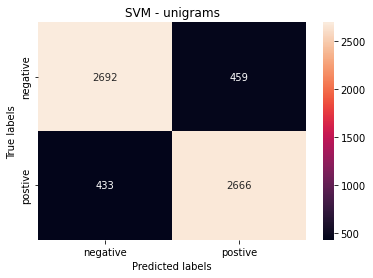

In [ ]:
classifier = SVC()
param_grid = {'C': [ 1],
              'gamma': ['scale'],
              'kernel': ['rbf']}

grid_search = GridSearchCV(classifier, param_grid)
grid_search.fit(train_x,train_y)
print(grid_search.best_params_)

pred_y = grid_search.predict(test_x)
accuracy = np.round(accuracy_score(test_y, pred_y),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y, test_y, "SVM - unigrams")

pickle.dump(grid_search,open("svm_uni.sav", "wb"))

Accuracy is equal 84.26%


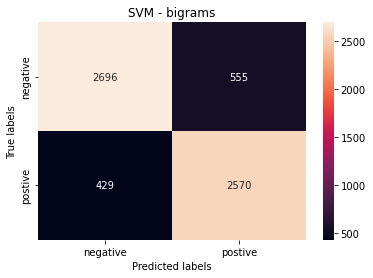

In [ ]:
n_estimators = 10

clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel='rbf', C=1, gamma=1,
                                                probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
clf.fit(train_x,train_y)

pred_y = clf.predict(test_x)
accuracy = np.round(accuracy_score(test_y, pred_y),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y, test_y, "SVM - bigrams")

# pickle.dump(clf,open("svm.sav", "wb"))

Accuracy is equal 84.61%


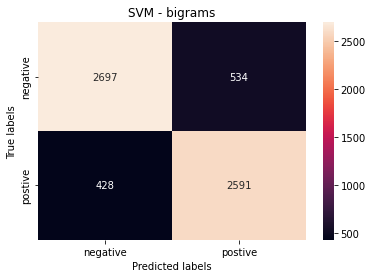

In [ ]:
n_estimators = 10

clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel='rbf', C=1, gamma='scale',
                                                probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
clf.fit(train_x,train_y)

pred_y = clf.predict(test_x)
accuracy = np.round(accuracy_score(test_y, pred_y),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y, test_y, "SVM - bigrams")

# pickle.dump(clf,open("svm.sav", "wb"))

Accuracy is equal 50.0%


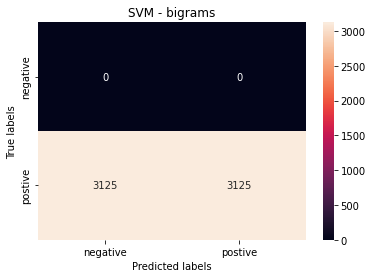

In [ ]:
n_estimators = 10

clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel='rbf', C=1, gamma='auto',
                                                probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
clf.fit(train_x,train_y)

pred_y = clf.predict(test_x)
accuracy = np.round(accuracy_score(test_y, pred_y),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y, test_y, "SVM - bigrams")

# pickle.dump(clf,open("svm.sav", "wb"))

Accuracy is equal 75.84%


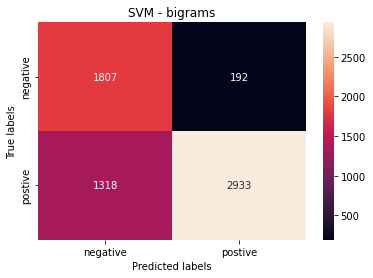

In [ ]:
n_estimators = 10

clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel='rbf', C=0.1, gamma='scale',
                                                probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
clf.fit(train_x,train_y)

pred_y = clf.predict(test_x)
accuracy = np.round(accuracy_score(test_y, pred_y),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y, test_y, "SVM - bigrams")

# pickle.dump(clf,open("svm.sav", "wb"))

Accuracy is equal 84.7%


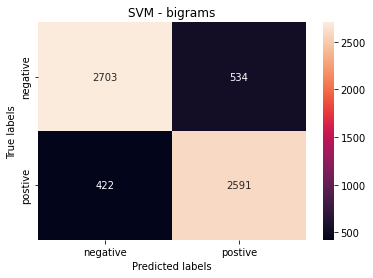

In [ ]:
n_estimators = 10

clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel='rbf', C=10, gamma='scale',
                                                probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
clf.fit(train_x,train_y)

pred_y = clf.predict(test_x)
accuracy = np.round(accuracy_score(test_y, pred_y),4)*100
print("Accuracy is equal {}%".format(accuracy))
cm_plot(pred_y, test_y, "SVM - bigrams")

# pickle.dump(clf,open("svm.sav", "wb"))